<a href="https://colab.research.google.com/github/Shibli-Nomani/project-01--Heart-Disease/blob/main/hyper_para_multiple_ml_undersample_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/Final Project/train.csv'
df=pd.read_csv(path)
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.422409,0,0,1,-0.366034,-0.460504,0,0,12,5,0,1,4,-0.142328,0,0,0
1,0,-0.653422,0,0,0,-0.366034,-0.460504,0,0,11,5,0,0,2,-1.033281,0,0,1
2,0,0.822955,1,0,0,4.347674,-0.460504,1,0,12,5,2,0,2,1.639578,1,0,0
3,0,-0.208323,0,0,0,-0.366034,-0.460504,0,0,12,5,1,0,1,-1.924234,0,1,0
4,0,2.621233,0,0,0,-0.366034,-0.460504,1,1,9,5,0,1,2,2.530531,0,0,0


In [ ]:
#target
y=df['HeartDisease']
#features
X=df.copy()
X=df.drop('HeartDisease', axis=1)
X.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.422409,0,0,1,-0.366034,-0.460504,0,0,12,5,0,1,4,-0.142328,0,0,0
1,-0.653422,0,0,0,-0.366034,-0.460504,0,0,11,5,0,0,2,-1.033281,0,0,1
2,0.822955,1,0,0,4.347674,-0.460504,1,0,12,5,2,0,2,1.639578,1,0,0
3,-0.208323,0,0,0,-0.366034,-0.460504,0,0,12,5,1,0,1,-1.924234,0,1,0
4,2.621233,0,0,0,-0.366034,-0.460504,1,1,9,5,0,1,2,2.530531,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, auc,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



#**Under Sampling**

In [ ]:
df1=df.copy()
#Target
y_us=df1['HeartDisease']
#Features

X_us=df1.copy()
X_us=df1.drop('HeartDisease', axis=1)

In [ ]:
from imblearn.under_sampling import NearMiss
NearMiss_obj = NearMiss()
X_us , y_us = NearMiss_obj.fit_resample(X_us,y_us)
print(X_us.shape)
print(y_us.shape)

(31722, 17)
(31722,)


In [ ]:
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us,y_us,test_size = 0.2, random_state=42)

#Compare Different Model without Hyperparameter Tuning

In [ ]:
models = [
   LogisticRegression(),
   LinearSVC(random_state=42),
   SGDClassifier(),
   KNeighborsClassifier(),
   RandomForestClassifier(random_state=42),
   DecisionTreeClassifier(random_state=42),
   GradientBoostingClassifier(random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]

In [ ]:
names =['Logestic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_us_train, y_us_train)
    y_us_pred=ml.fit(X_us_train, y_us_train).predict(X_us_test)
    fp, tp, tn = roc_curve(y_us_test, y_us_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_us_train, y_us_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_us_test, y_us_test), 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'f1 Score']=f1_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_us_test, y_us_pred)
    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    


In [ ]:

models_compare.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})


,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC,mean abs error
6,GradientBoost,0.883200,0.883530,0.924616,0.830552,0.875063,0.882603,0.116470
7,XGBOOST,0.880920,0.878010,0.931149,0.811617,0.867284,0.876852,0.121986
8,ADABoost,0.875120,0.875020,0.914377,0.822529,0.866025,0.874101,0.124980
4,RandomForest,0.975840,0.856260,0.859192,0.845956,0.852523,0.856084,0.143735
2,SGD,0.855180,0.853900,0.910386,0.779204,0.839703,0.852594,0.146099
5,DecisionTree,0.975960,0.850590,0.858466,0.833119,0.845603,0.850285,0.149409
0,Logestic Regression,0.852430,0.850120,0.901968,0.779525,0.836289,0.848883,0.149882
1,SVMLinear,0.851560,0.849490,0.908507,0.771181,0.834230,0.848118,0.150512
3,KNN,0.880010,0.832780,0.924411,0.718228,0.808380,0.830777,0.167218
9,LDA,0.816570,0.814660,0.908938,0.691913,0.785714,0.812509,0.185343


#**Compare Different Model with Hyperparameter Tuning**

**Multiple Classification Model List**

In [ ]:
# Different ML Models
ml1=LogisticRegression(random_state=42)
ml2=LinearSVC(random_state=42)
ml3=SGDClassifier(random_state=42)
ml4=KNeighborsClassifier()
ml5=RandomForestClassifier(random_state=42)
ml6=DecisionTreeClassifier(random_state=42)
ml7=GradientBoostingClassifier(random_state=42)
ml8=XGBClassifier(random_state=42)
ml9=AdaBoostClassifier(random_state=42)
ml10=LinearDiscriminantAnalysis()
   

**Logistic Regression**

In [ ]:
#Logistic Regression
param1 = {}
param1['classifier__C'] = [ 1, 2, 5]
param1['classifier__solver']=['lbfgs', 'liblinear', 'saga']
param1['classifier__penalty'] = ['l1', 'l2']
param1['classifier__multi_class'] = ['ovr', 'multinomial', 'auto']
param1['classifier'] = [ml1]
pipeline = Pipeline([('classifier', ml1)])
gs = GridSearchCV(pipeline, param1, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)


In [ ]:
gs.best_params_

{'classifier': LogisticRegression(C=5, multi_class='ovr', random_state=42),
 'classifier__C': 5,
 'classifier__multi_class': 'ovr',
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [ ]:
gs.best_score_

0.9045032580688824

**SVM Linear**

In [ ]:
#SVM Linear
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__max_iter'] = [2500]
param2['classifier__tol']=[1e-3, 1e-5, 1e-7]
param2['classifier__multi_class'] = ['ovr', 'multinomial', 'auto']
param2['classifier__loss'] = ['squared_hinge', 'crammer_singer','hinge' ]    
param2['classifier'] = [ml2]
pipeline = Pipeline([('classifier', ml2)])
gs = GridSearchCV(pipeline, param2, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier': LinearSVC(C=1, max_iter=2500, random_state=42, tol=0.001),
 'classifier__C': 1,
 'classifier__max_iter': 2500,
 'classifier__tol': 0.001}

In [ ]:
gs.best_score_

0.9041133387293258

**SGD**

Text(0, 0.5, 'Testing Accuracy')

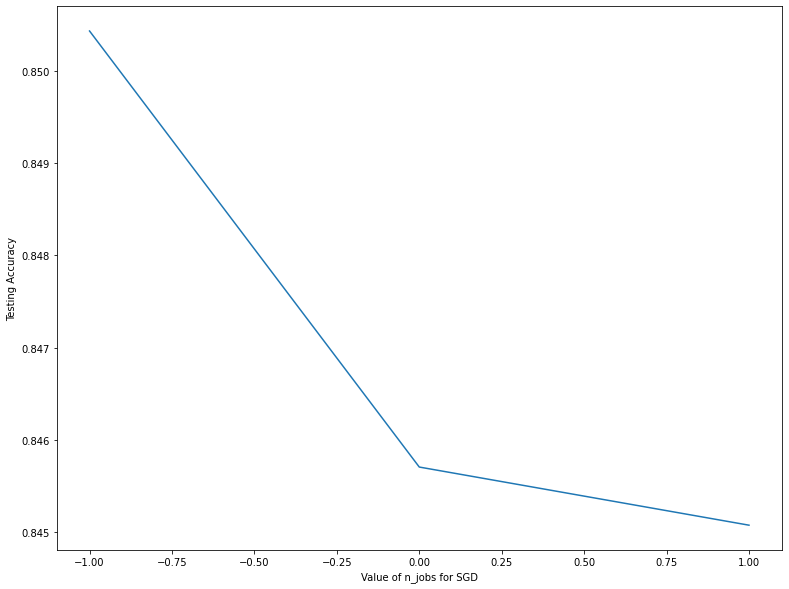

In [ ]:
scores= []
for k in range(-1,2):
	sgd_val=SGDClassifier(n_jobs=k)
	sgd_val.fit(X_us_train, y_us_train)
	y_val = sgd_val.predict(X_us_test)
	scores.append (accuracy_score(y_us_test, y_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(-1,2),scores)
plt.xlabel ('Value of n_jobs for SGD')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

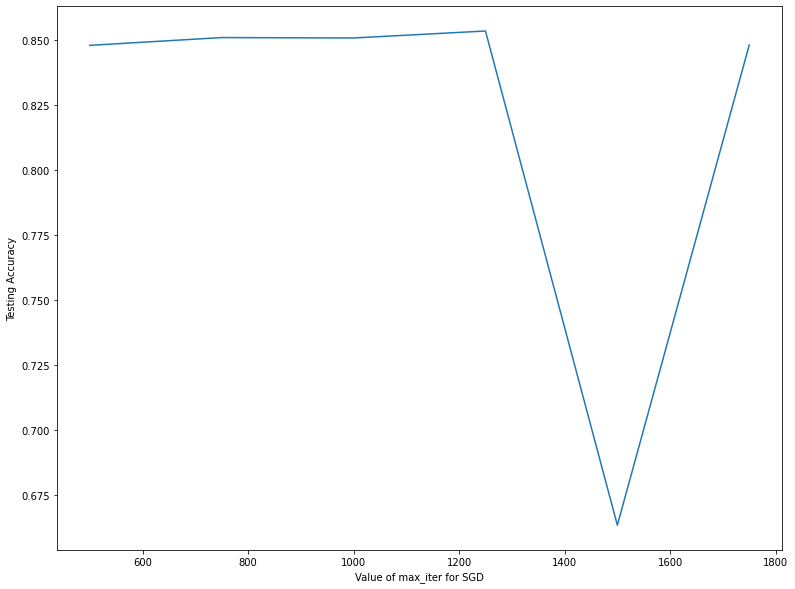

In [ ]:
scores= []
for k in range(500,2000,250):
	sgd_val=SGDClassifier(max_iter=k)
	sgd_val.fit(X_us_train, y_us_train)
	y_val = sgd_val.predict(X_us_test)
	scores.append (accuracy_score(y_us_test, y_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(500,2000,250),scores)
plt.xlabel ('Value of max_iter for SGD')
plt.ylabel('Testing Accuracy')

In [ ]:
#SGD
param3 = {}
param3['classifier__max_iter'] = [200,500,1000, 1200, 1500]
param3['classifier__tol']=[1e-3, 1e-5]
param3['classifier__penalty']=['l1', 'l2']
param3['classifier__loss'] = ['hinge', 'log_loss', 'log', 'modified_huber','squared_hinge', 'perceptron', 
'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
param3['classifier'] = [ml3]
pipeline = Pipeline([('classifier', ml3)])


In [ ]:
gs = GridSearchCV(pipeline, param3, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_us_train, y_us_train)
gs.best_params_

{'classifier': SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42),
 'classifier__loss': 'log',
 'classifier__max_iter': 200,
 'classifier__penalty': 'l1',
 'classifier__tol': 0.001}

In [ ]:
gs.best_params_

{'classifier': SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42),
 'classifier__loss': 'log',
 'classifier__max_iter': 200,
 'classifier__penalty': 'l1',
 'classifier__tol': 0.001}

In [ ]:
gs.best_score_

0.9045399587200187

**K-nearest Neighbouring **


**k-value identification for KNN**

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_us_train,y_us_train)
    yhat= knn.predict(X_us_test)
    mean_acc[i-1] = accuracy_score(y_us_test, yhat)

mean_acc

array([0.8215918 , 0.83420016, 0.83483058, 0.82994484, 0.83278172,
       0.82411348, 0.82631994, 0.81654846, 0.82064618, 0.81544523,
       0.82237983, 0.81292356, 0.81875493, 0.81213554, 0.81828211,
       0.81292356, 0.81749409, 0.81308117, 0.81891253, 0.81323877])

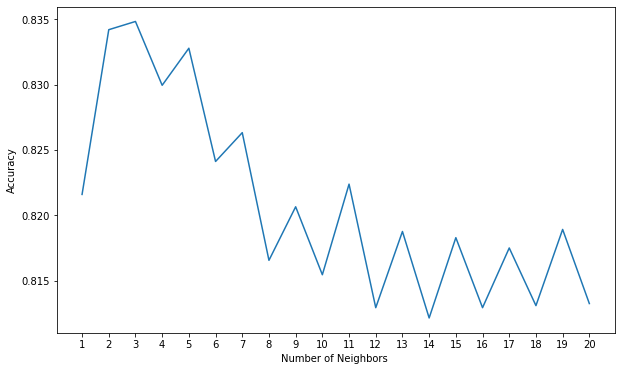

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#KNN
param4 = {}
param4['classifier__n_neighbors'] = [2]
param4['classifier__weights'] = ['uniform','distance']
param4['classifier__metric'] =['minkowski','euclidean','manhattan']
param4['classifier'] = [ml4]
pipeline = Pipeline([('classifier', ml4)])
gs = GridSearchCV(pipeline, param4, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=2),
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 2,
 'classifier__weights': 'uniform'}

In [ ]:
gs.best_score_

0.8623346597592031

**Random Forest Classifier**

**n_estimators for RandomForest**

Text(0, 0.5, 'Testing Accuracy')

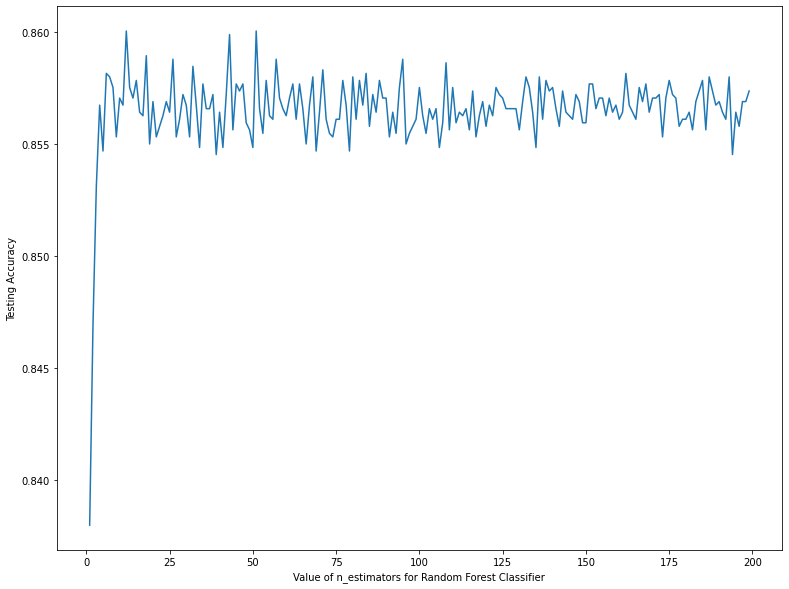

In [ ]:
scores= []
for k in range(1,200):
	rfc_val=RandomForestClassifier (n_estimators=k)
	rfc_val.fit(X_us_train, y_us_train)
	y_us_val = rfc_val.predict(X_us_test)
	scores.append (accuracy_score(y_us_test, y_us_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(1,200),scores)
plt.xlabel ('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

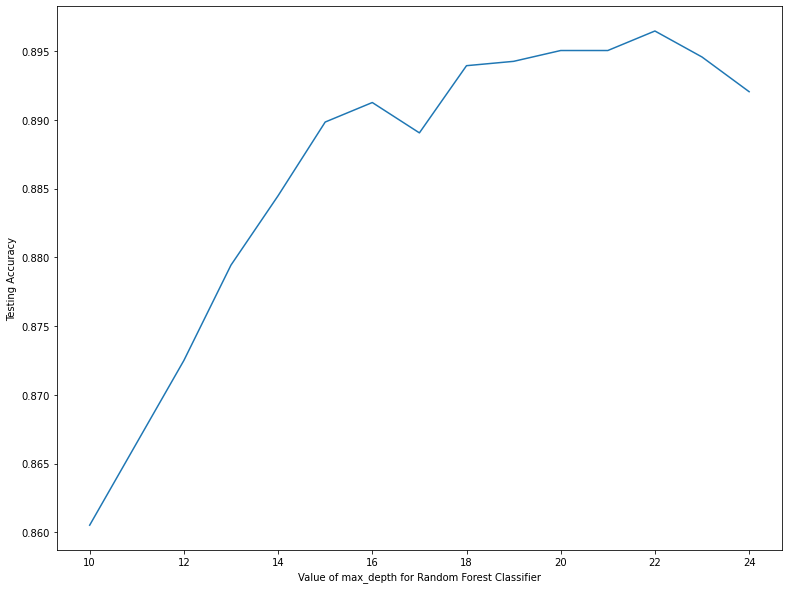

In [ ]:
scores= []
for k in range(10,25):
	rfc_val=RandomForestClassifier (max_depth=k)
	rfc_val.fit(X_us_train, y_us_train)
	y_us_val = rfc_val.predict(X_us_test)
	scores.append (accuracy_score(y_us_test, y_us_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(10,25),scores)
plt.xlabel ('Value of max_depth for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
#RandomForest
param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}]
param5['classifier'] = [ml5]
pipeline = Pipeline([('classifier', ml5)])
gs = GridSearchCV(pipeline, param5, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [ ]:
gs.best_score_

0.9414922152629961

**Decision Tree Classifier**

In [ ]:
#DecisionTree
param6 = {}
param6['classifier__max_depth'] = [5,10,25,None]
param6['classifier__min_samples_split'] = [2,5,10]
param6['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}]
param6['classifier'] = [ml6]
pipeline = Pipeline([('classifier', ml6)])
gs = GridSearchCV(pipeline, param6, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier': DecisionTreeClassifier(max_depth=25, min_samples_split=10, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 25,
 'classifier__min_samples_split': 10}

In [ ]:
gs.best_score_

0.9109624567689596

**Gradient Descent Classifier**

In [ ]:
#Gradient Descent Classifier
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 200]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [ml7]
pipeline = Pipeline([('classifier', ml7)])
gs = GridSearchCV(pipeline, param7, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 200}

In [ ]:
gs.best_score_

0.9407995468462188

**XGBOOST**

In [ ]:
#XGBoost
param8 = {}
param8['classifier__max_depth'] = [5,6,8,10,None]
param8['classifier__learning_rate'] = [ 0.1, 0.2, 0.3]
param8['classifier__gamma']=[ 0.0, 0.1, 0.2]
pipeline = Pipeline([('classifier', ml8)])
gs = GridSearchCV(pipeline, param8, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier__gamma': 0.0,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 8}

In [ ]:
gs.best_score_

0.9423200868039503

**AdaBoost**

In [ ]:
#AdaBoost
param9 = {}
param9['classifier__n_estimators'] = [10, 50, 70,100]
param9['classifier__learning_rate']=[ 1, 2]
pipeline = Pipeline([('classifier', ml9)])
gs = GridSearchCV(pipeline, param9, cv=3, n_jobs=1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
gs.best_params_

{'classifier__learning_rate': 1, 'classifier__n_estimators': 100}

In [ ]:
gs.best_score_

0.9323758376480221

In [ ]:
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_us_train, y_us_train)

In [ ]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

In [ ]:
gs.best_score_

**Multiple ML model Prepare**

In [ ]:
models = [
LogisticRegression(C=5, multi_class='ovr', random_state=42),

LinearSVC(C=1, max_iter=2500, random_state=42, tol=0.001),

SGDClassifier(loss='log', penalty='l1', random_state=42),

KNeighborsClassifier(n_neighbors=2),

RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),

DecisionTreeClassifier(max_depth=25, min_samples_split=10, random_state=42),

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42),

XGBClassifier(random_state=42),

AdaBoostClassifier(random_state=42),
LinearDiscriminantAnalysis()
   ]

In [ ]:
names =['Logestic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_us_train, y_us_train)
    y_us_pred=ml.fit(X_us_train, y_us_train).predict(X_us_test)
    fp, tp, tn = roc_curve(y_us_test, y_us_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_us_train, y_us_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_us_test, y_us_test), 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'f1 Score']=f1_score(y_us_test, y_us_pred)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_us_test, y_us_pred)
    row_index+=1
    
models_table=models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    

In [ ]:
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True) 

models_compare

,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC,mean abs error
6,GradientBoost,0.90444,0.89567,0.936966,0.844352,0.888251,0.894768,0.104334
4,RandomForest,0.91634,0.89456,0.956360,0.822850,0.884595,0.893308,0.105437
5,DecisionTree,0.91350,0.88274,0.938609,0.814506,0.872165,0.881548,0.117258
7,XGBOOST,0.88092,0.87801,0.931149,0.811617,0.867284,0.876852,0.121986
8,ADABoost,0.87512,0.87502,0.914377,0.822529,0.866025,0.874101,0.124980
2,SGD,0.85313,0.85028,0.920419,0.760911,0.833099,0.848712,0.149724
1,SVMLinear,0.85325,0.84996,0.903130,0.777920,0.835862,0.848700,0.150039
0,Logestic Regression,0.85310,0.84965,0.899483,0.781130,0.836139,0.848447,0.150355
3,KNN,0.89557,0.83420,0.954626,0.695443,0.804679,0.831772,0.165800
9,LDA,0.81657,0.81466,0.908938,0.691913,0.785714,0.812509,0.185343
